In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from skimage import data, color, io

In [13]:
from skimage.restoration import denoise_tv_chambolle, inpaint_biharmonic
from skimage import transform

In [8]:
damaged_image = io.imread(
    '/Users/juansantateresagomez/Desktop/Image_Processing/Image Processing with Python course exercise dataset/chapter 4/sally_damaged_image.jpg')

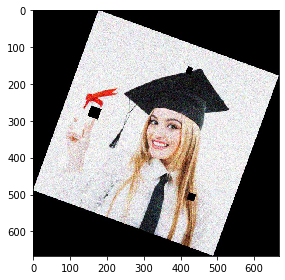

In [9]:
io.imshow(damaged_image)

In [14]:
upright_image = transform.rotate(damaged_image, 20)

In [16]:
upright_image_without_noise = denoise_tv_chambolle(upright_image, weight=0.1, multichannel=True)

In [17]:
def get_mask(image):
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

In [18]:
mask = get_mask(upright_image)

In [19]:
result = inpaint_biharmonic(upright_image_without_noise,mask,multichannel=True)

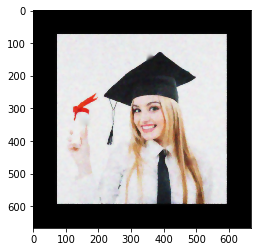

In [20]:
plt.imshow(result)